In [12]:
%%shell
if ! command -v julia 3>&1 > /dev/null
then
    wget 'https://julialang-s3.julialang.org/bin/linux/x64/1.4/julia-1.4.1-linux-x86_64.tar.gz' -O julia.tar.gz
    tar -x -f julia.tar.gz -C /usr/local --strip-components 1
    rm julia.tar.gz
fi
    julia -e '\
        using Pkg                                                          ;\
        Pkg.update()                                                       ;\
        Pkg.add("IJulia")                                                  ;\
        Pkg.add("Clustering")                                              ;\
        Pkg.add("Distances")                                               ;\
        Pkg.add("RDatasets")                                               ;\
        Pkg.add("DataFrames")                                              ;\
        Pkg.add("CSV")                                                     ;\
        Pkg.add("Gadfly")                                                  ;\
        Pkg.add("Plots")                                                   ;\
        Pkg.add("Cairo")                                                   ;\
        Pkg.add("Fontconfig")                                              ;\
        Pkg.update()                                                       ;\
        Pkg.precompile()                                                   ;\'
echo 'Done'

   Updating registry at `~/.julia/registries/General`
   Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environme

# Julia 機器學習：Clustering 分群模型

## 作業 028：資料分群

從提供的檔案中讀取資料，利用分群模型將資料分群後並將資料視覺化。資料中有 15 群，並利用 k-means 去對資料做分群。資料取自 http://cs.uef.fi/sipu/datasets/

2×8 DataFrame
│ Row │ variable │ mean     │ min   │ median   │ max    │ nunique │ nmissing │ eltype   │
│     │ Symbol   │ Float64  │ Int64 │ Float64  │ Int64  │ Nothing │ Nothing  │ DataType │
├─────┼──────────┼──────────┼───────┼──────────┼────────┼─────────┼──────────┼──────────┤
│ 1   │ x        │ 514938.0 │ 19835 │ 505338.0 │ 961951 │         │          │ Int64    │
│ 2   │ y        │ 494709.0 │ 51121 │ 526260.0 │ 970756 │         │          │ Int64    │


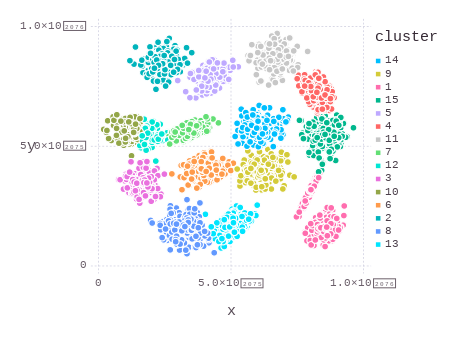

In [20]:
from google.colab.patches import cv2_imshow
import cv2

!julia -e '\
using Clustering, DataFrames, Distances, Gadfly, CSV                                                        ;\
import Cairo, Fontconfig                                                                                    ;\
url =  "https://julia-fileentity.cupoy.com/1st/homework/example/1584094958973/s1-set.csv?t=1588559895110"   ;\
df = CSV.read(download(url))                                                                                ;\
println(describe(df))                                                                                       ;\
n = nrow(df)                                                                                                ;\
D = zeros(n, n)                                                                                             ;\
for i = 1:n                                                                                                 ;\
    a = Vector{Float64}(df[i, 1:2])                                                                         ;\
    for j = 1:n                                                                                             ;\
        b = Vector{Float64}(df[j, 1:2])                                                                     ;\
        D[i, j] = euclidean(a, b)                                                                           ;\
    end                                                                                                     ;\
end                                                                                                         ;\
k = 15                                                                                                      ;\
result = kmeans(D, k)                                                                                       ;\
df[!, :cluster] = string.(assignments(result))                                                              ;\
dfMean = plot(df, x="x", y="y", color="cluster", Geom.point)                                                ;\
draw(PNG("dfMean.png", 12cm, 9cm), dfMean)                                                                  ;\'

cv2_imshow( cv2.imread('dfMean.png', cv2.IMREAD_UNCHANGED) )